 **LIBRARIES USED**

In [70]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns

**Reading Dataset**

In [71]:
df = pd.read_csv('Housing.csv')
print("Dataframe shape: ",df.shape)
df.describe()

Dataframe shape:  (545, 13)


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Preprocessing**

In [72]:
# Clean Dataset
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)# Drop duplicates and update the dataframe

df['furnishingstatus'] = df['furnishingstatus'].replace({
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
})
columns_to_convert = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea'
]

# Replacing 'yes' with 1 and 'no' with 0 in the specified columns
df[columns_to_convert] = df[columns_to_convert].replace({'yes': 1, 'no': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


**Sorting Data into Test and Train**

In [73]:
X = df.drop(['price'],axis=1)
Y = df['price']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

**Data Exploration**

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>],
       [<Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'furnishingstatus'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

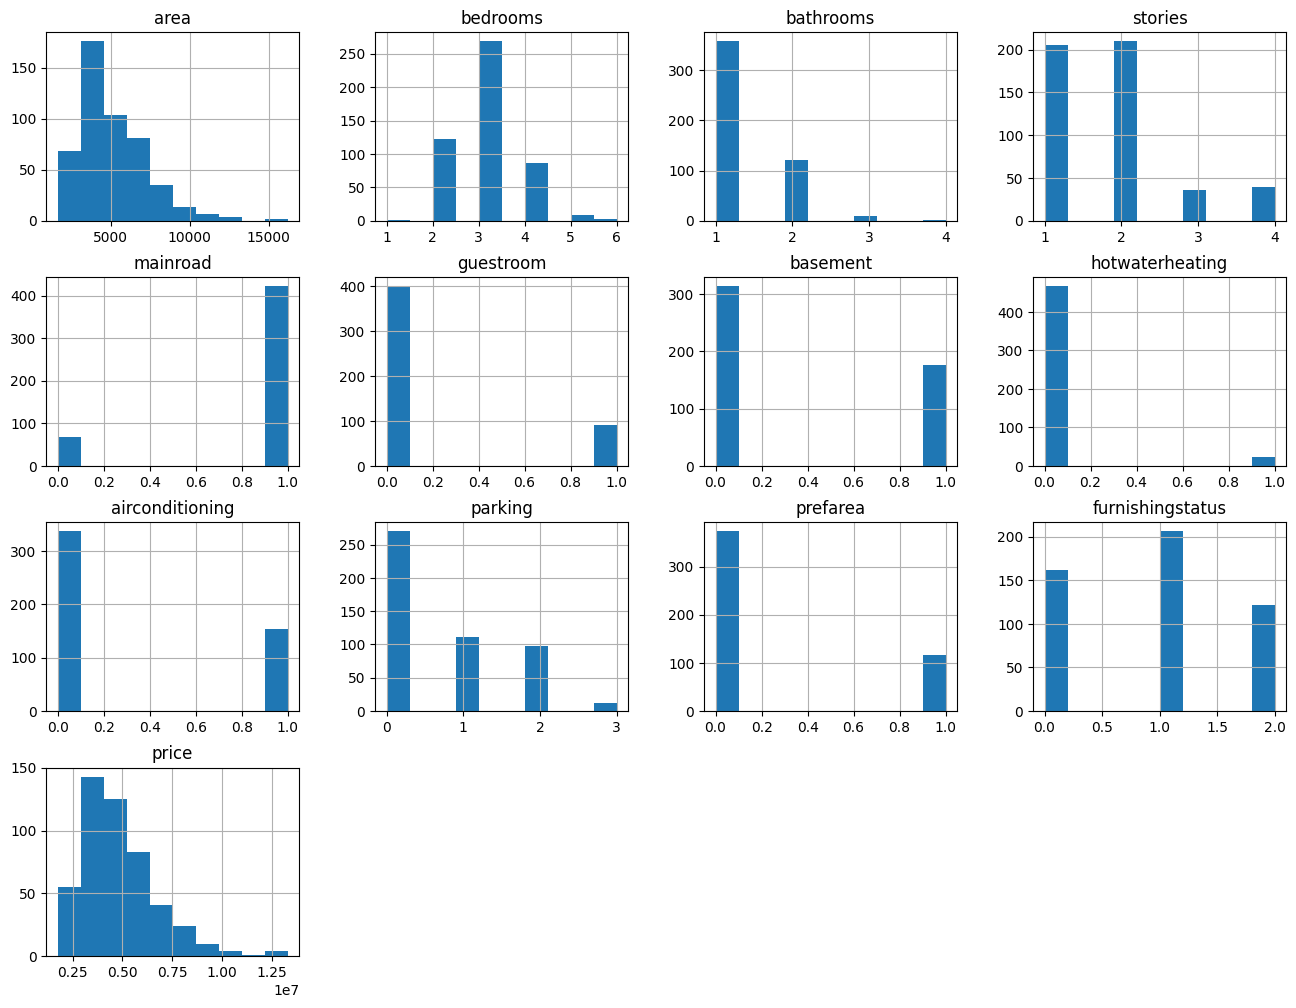

In [74]:
train_data=X_train.join(y_train)
train_data.hist(figsize=(16,12))

<Axes: >

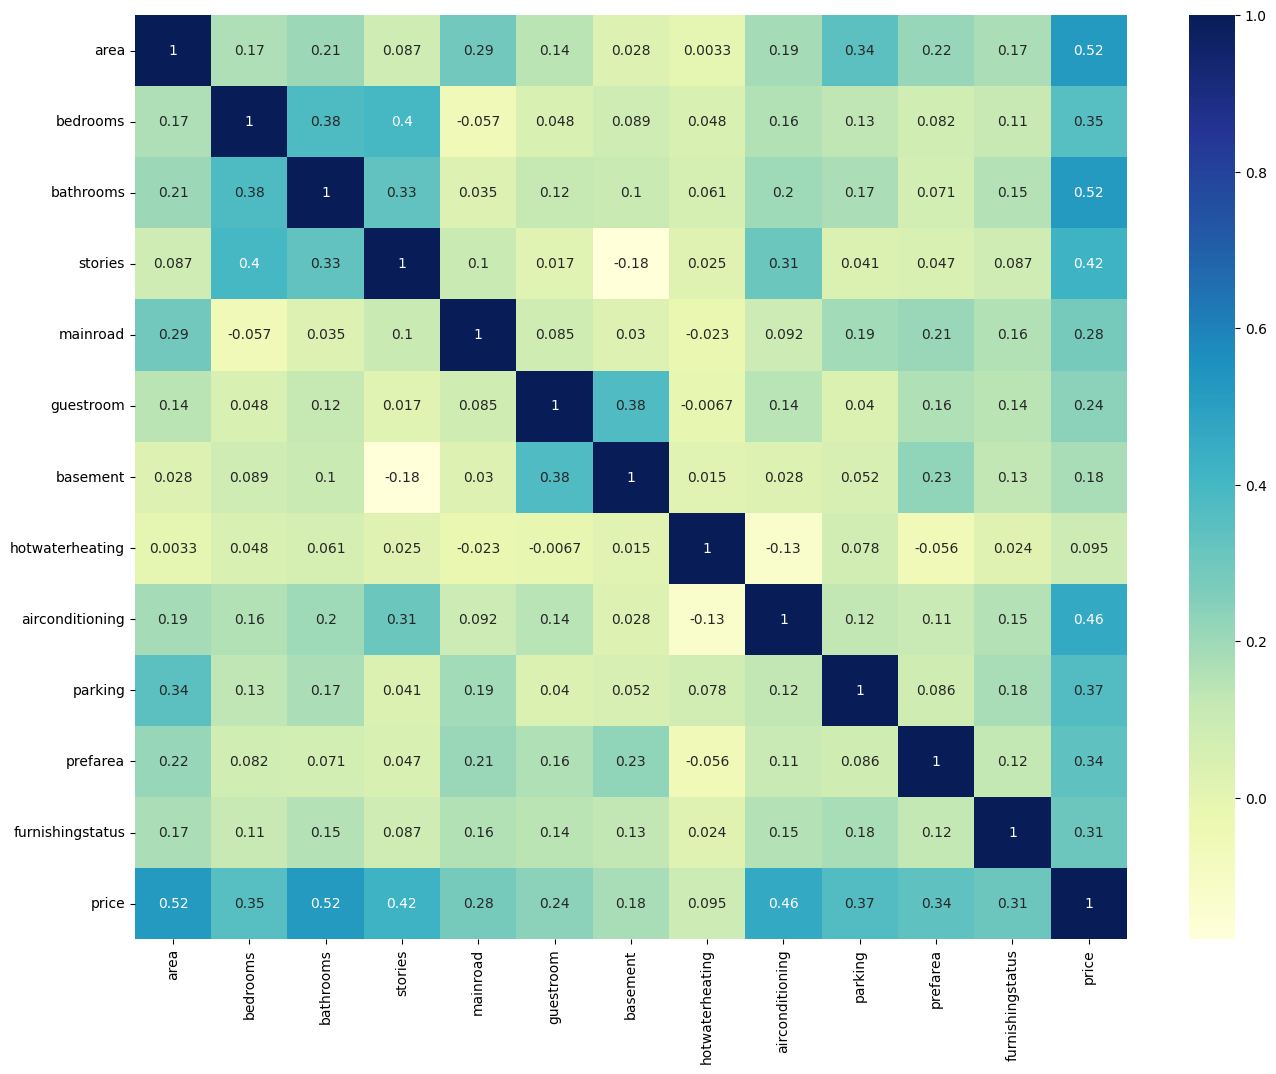

In [75]:
plt.figure(figsize=(16,12))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

**Model learning**

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#Scaling Input Data
X_train, y_train=train_data.drop(['price'],axis=1), train_data['price']
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)

model = LinearRegression()

# Trainign the model
model.fit(X_train_s, y_train)

LinearRegression()

 **Model Evaluation**

R^2 Score: 0.703910950287763
Mean Absolute Error (MAE): 778893.2288201763
Model Score on test:  0.703910950287763


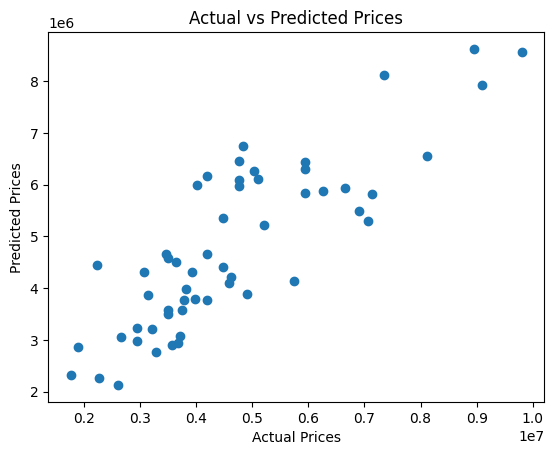

In [77]:
# Make predictions on the test set
y_pred = model.predict(X_test_s)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print("Model Score on test: ",model.score(X_test_s,y_test))

# visualizing the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()